In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimnetal.set_memory_growth(gpu,True)

In [4]:
gpus

[]

In [5]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
aiofiles                     23.2.1
albumentations               1.4.0
altair                       5.2.0
annotated-types              0.6.0
anyio                        4.3.0
array-record                 0.4.1
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        23.2.0
beautifulsoup4               4.12.3
cachetools                   5.3.2
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
distlib                      0.3.8
dm-tree                      0.1.8
etils                        1.5.2
exceptiongroup               1.2.0
exec

In [6]:
import cv2
import imghdr

In [7]:
data_dir='data'

In [8]:
image_exts=['jpeg','jpg','bmp','png']
        

In [9]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))
            os.remove(image_path)

In [7]:
import numpy as np
data=tf.keras.utils.image_dataset_from_directory('data')
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

Found 165 files belonging to 2 classes.


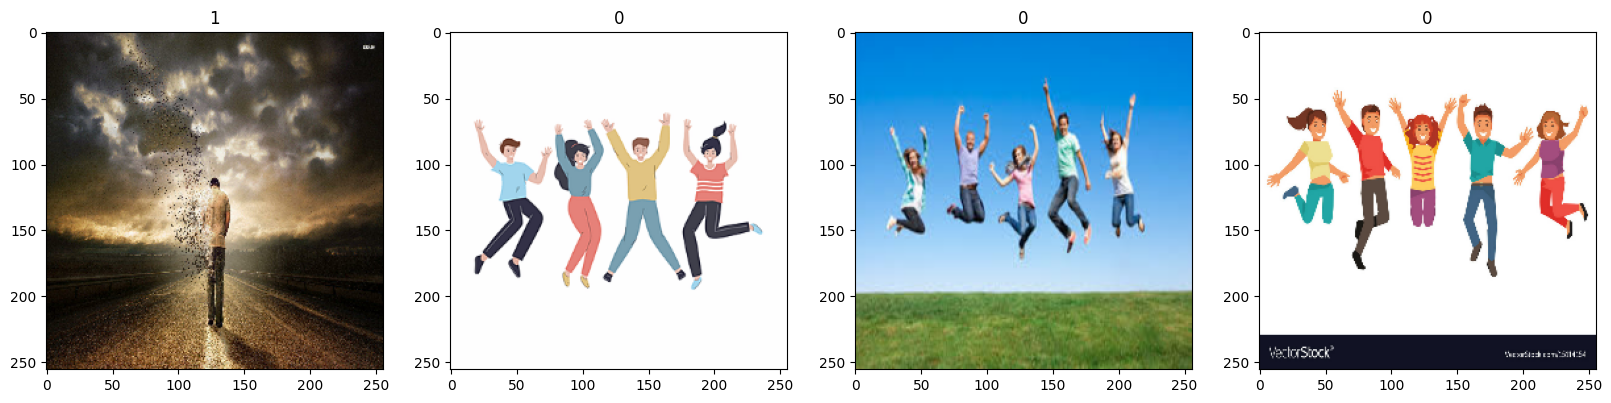

In [8]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data=data.map(lambda x,y:(x/255,y))
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

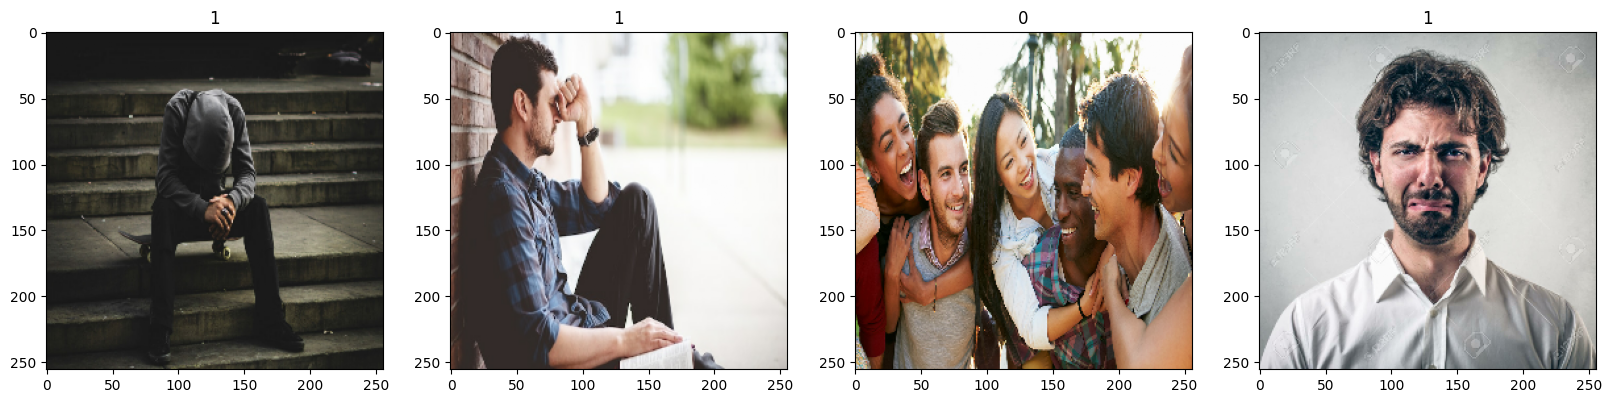

In [10]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [11]:
train_size=(int(len(data)*.7))
val_size=(int(len(data)*.2))+1
test_size=(int(len(data)*.1))+1
print(train_size,val_size,test_size)

4 2 1


In [12]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [14]:
model=Sequential()

In [15]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [17]:
#model.summary()

In [18]:
logdir='logs'

In [19]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 15s 3s/step - loss: 1.1649 - accuracy: 0.4844 - val_loss: 0.7980 - val_accuracy: 0.5405
Epoch 2/20
4/4 [==============================] - 10s 2s/step - loss: 0.6811 - accuracy: 0.5859 - val_loss: 0.6235 - val_accuracy: 0.8378
Epoch 3/20
4/4 [==============================] - 11s 2s/step - loss: 0.5791 - accuracy: 0.7734 - val_loss: 0.5374 - val_accuracy: 0.6486
Epoch 4/20
4/4 [==============================] - 12s 3s/step - loss: 0.4899 - accuracy: 0.6953 - val_loss: 0.4137 - val_accuracy: 0.8649
Epoch 5/20
4/4 [==============================] - 11s 2s/step - loss: 0.4225 - accuracy: 0.8828 - val_loss: 0.4206 - val_accuracy: 0.7838
Epoch 6/20
4/4 [==============================] - 11s 2s/step - loss: 0.3291 - accuracy: 0.8828 - val_loss: 0.2703 - val_accuracy: 0.9459
Epoch 7/20
4/4 [==============================] - 12s 2s/step - loss: 0.2675 - accuracy: 0.9297 - val_loss: 0.1506 - val_accuracy: 0.9730
Epoch 8/20
4/4 [==================

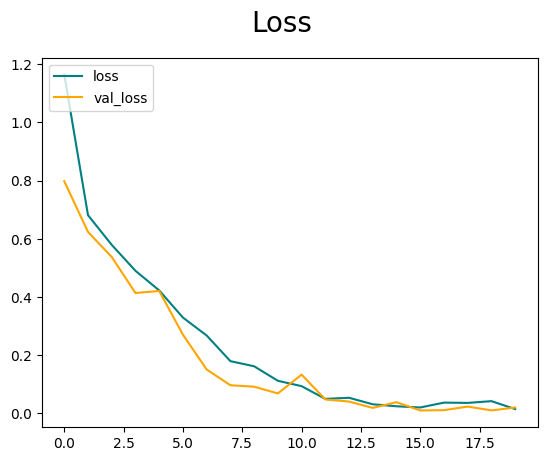

In [21]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

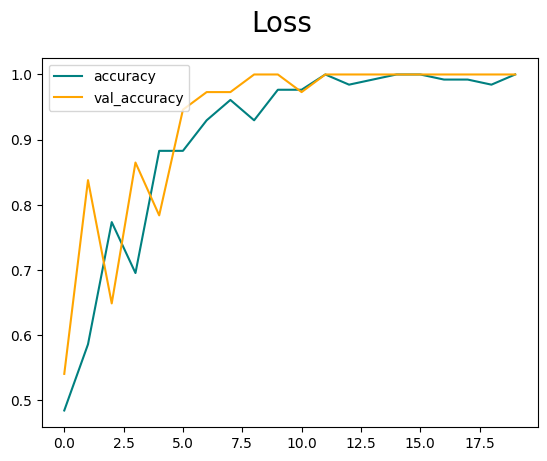

In [22]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
from tensorflow.keras.metrics import Precision,Recall
pre=Precision()
re=Recall()

In [24]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)

In [25]:
print(f'Precision:{pre.result().numpy()} , Recall:{re.result().numpy()}') #check Binary Accuracy and result

Precision:0.0 , Recall:0.0


In [59]:
img=cv2.imread(r"D:\ImageClassification\Screenshot 2024-03-01 at 9.27.01 AM.jpeg.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [60]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [56]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [57]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 75ms/step


In [58]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [34]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','happysadmodel.h5'))

In [35]:
os.path.join('models','happysadmodel.h5')

'models\\happysadmodel.h5'

In [36]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [37]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 222ms/step


In [38]:
if yhatnew>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
